# library import

In [ ]:
import librosa
import librosa.display as dsp
from IPython.display import Audio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import librosa
import librosa.display as dsp
from IPython.display import Audio
import pandas as pd
import numpy as np
import os
from tqdm import tqdm

# load csv file

In [ ]:
train = pd.read_csv('/content/gdrive/MyDrive/voice_project/train.csv')
train.head()

,file_name,label
0,001.wav,9
1,002.wav,0
2,004.wav,1
3,005.wav,8
4,006.wav,0


In [ ]:
train.shape

(400, 2)

In [ ]:
train.label.groupby(train.label).count()

label
0    40
1    40
2    40
3    40
4    40
5    40
6    40
7    40
8    40
9    40
Name: label, dtype: int64

In [ ]:
X = train.label.groupby(train.label).count().index
Y = train.label.groupby(train.label).count()

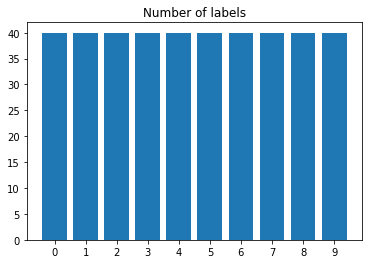

In [ ]:
plt.bar(X, Y)
plt.xticks(X)
plt.title("Number of labels")
plt.show()

# get audio from data

In [ ]:
def get_audio(num = 0):
    # Audio Sample Directory
    sample = os.listdir('/content/gdrive/MyDrive/voice_project/train/')
    temp = train[train.label == num].file_name
    file_name = temp[temp.index[0]]
    
    file = '/content/gdrive/MyDrive/voice_project/train/train/' + file_name
    # Get Audio from the location
    data,sample_rate = librosa.load(file)
    
    # Plot the audio wave
    dsp.waveshow(data,sr=sample_rate)
    plt.show()
    
    # Show the widget
    return Audio(data=data,rate=sample_rate)

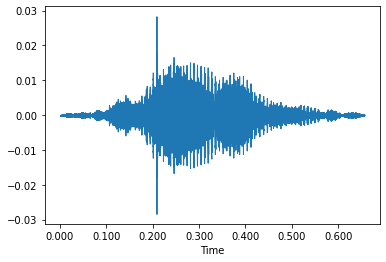

In [ ]:
get_audio(0)

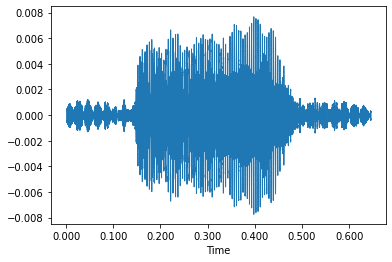

In [ ]:
get_audio(1)

# fourier_transform audio

In [ ]:
def fourier_transform(num = 0):
    # Audio Sample Directory
    sample = os.listdir('/content/gdrive/MyDrive/voice_project/train/')
    temp = train[train.label == num].file_name
    file_name = temp[temp.index[0]]
    
    file = '/content/gdrive/MyDrive/voice_project/train/train/' + file_name
    # Get Audio from the location
    data,sample_rate = librosa.load(file)

    fft = np.fft.fft(data) 

    magnitude = np.abs(fft)
    frequency = np.linspace(0, sample_rate, len(magnitude))

    left_frequency = frequency[:int(len(frequency)/2)]
    left_magnitude = magnitude[:int(len(magnitude)/2)]

    fig = plt.figure(figsize = (14,5))
    plt.plot(left_frequency, left_magnitude)
    plt.xlabel("Frequency")
    plt.ylabel("Magnitude")
    plt.title(f"Fourier transform of audio label {num}")
    plt.show()

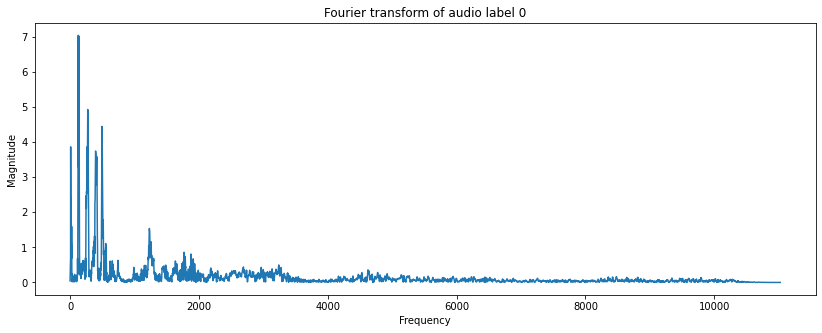

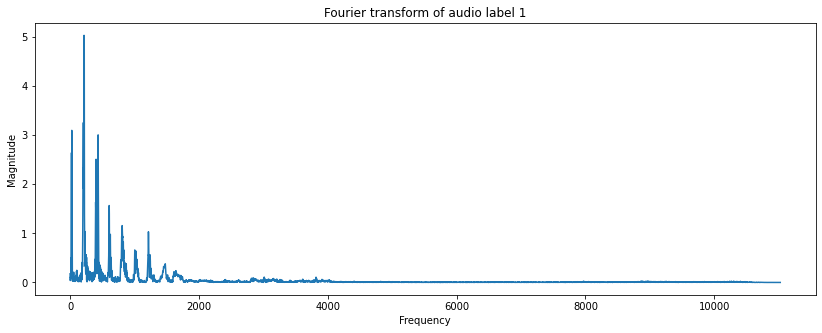

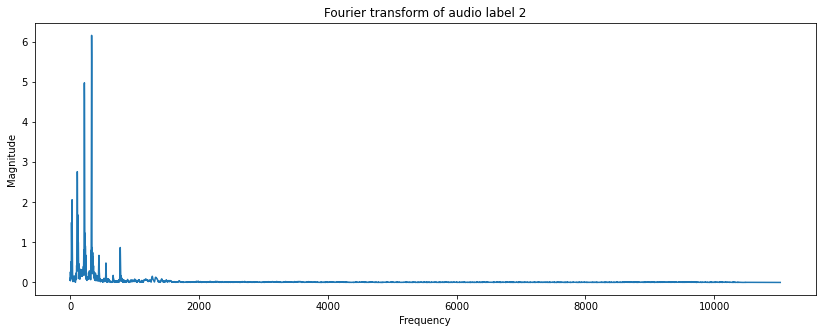

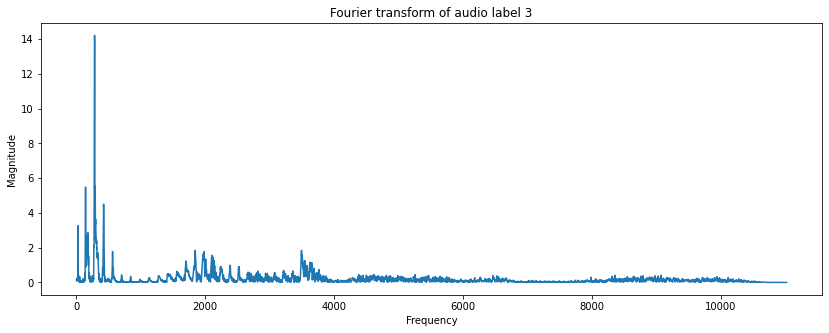

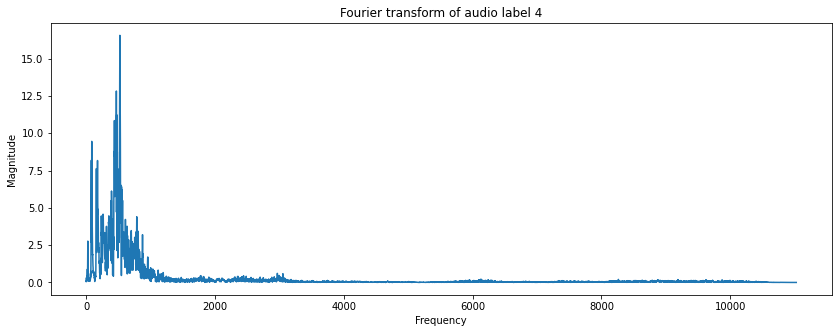

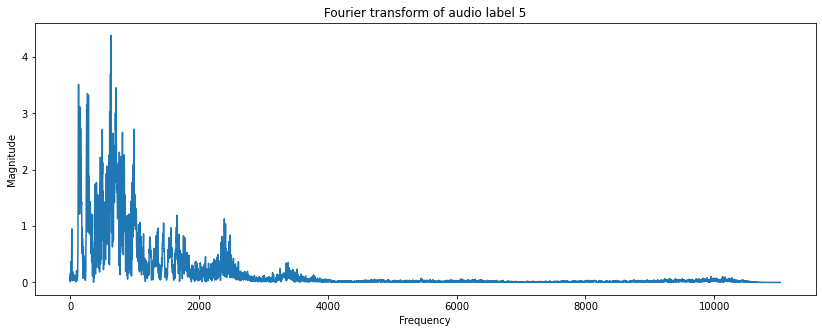

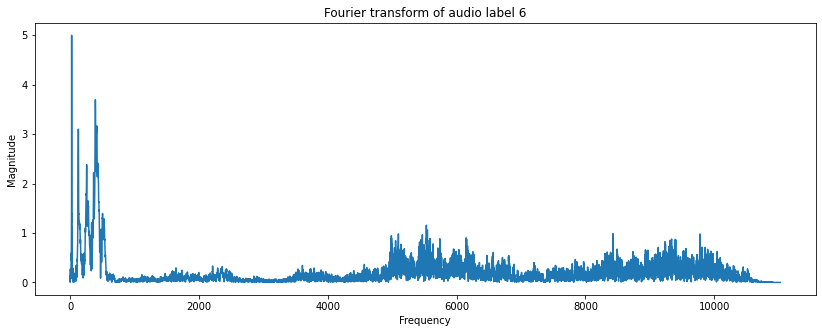

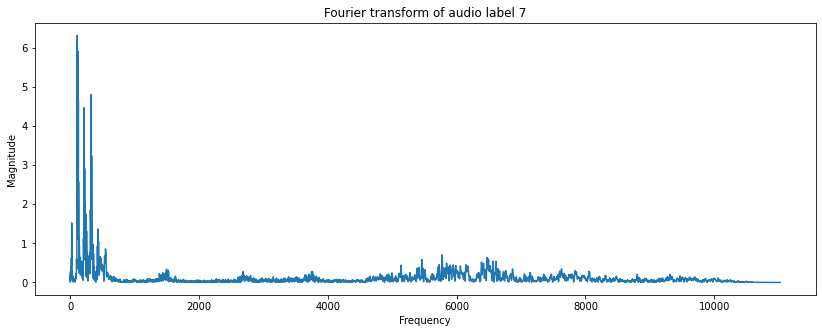

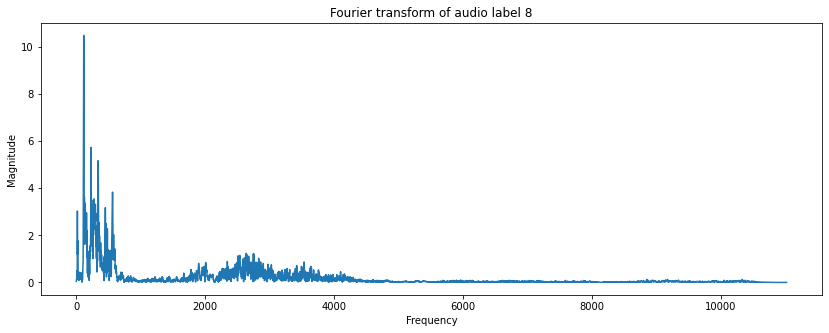

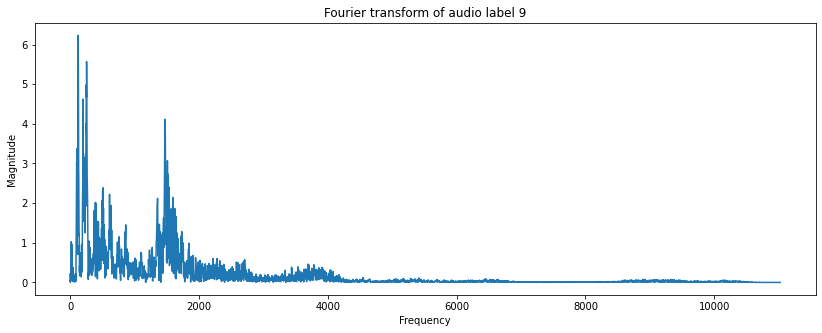

In [ ]:
for i in range(0,10):
    fourier_transform(i)

# preparing

In [ ]:
import random

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(929)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  400 non-null    object
 1   label      400 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 6.4+ KB


In [ ]:
data, sample_rate = librosa.load('/content/gdrive/MyDrive/voice_project/train/train/001.wav', sr = 16000)
print('sample_rate:', sample_rate, ', audio shape:', data.shape)
print('length:', data.shape[0]/float(sample_rate), 'secs')

sample_rate: 16000 , audio shape: (10192,)
length: 0.637 secs


# train_dataset

In [ ]:
def train_dataset():
    folder = "/content/gdrive/MyDrive/voice_project/train/train/"
    dataset = []
    for file in tqdm(os.listdir(folder),colour='green'):
        if 'wav' in file:
            abs_file_path = os.path.join(folder,file)
            data, sr = librosa.load(abs_file_path, sr = 16000)
            class_label = int(train[train.file_name == file].label)
            dataset.append([data,class_label])
    
    print("Dataset 생성 완료")
    return pd.DataFrame(dataset,columns=['data','label'])

In [ ]:
train_wav = train_dataset()

100%|██████████| 400/400 [00:14<00:00, 27.89it/s]

Dataset 생성 완료


In [ ]:
train_wav.head()

,data,label
0,"[1.2653453e-05, 2.3892262e-05, -7.51332e-06, 4...",0
1,"[0.00011985076, 0.00016174652, 0.00017246709, ...",9
2,"[-0.00010586961, -0.00020532755, -0.0002140045...",7
3,"[-0.00043892296, -0.00073743664, -0.0006132907...",8
4,"[9.2610695e-05, 0.00018442213, 0.00021447388, ...",7


# extract_features

In [ ]:
def extract_features(file):
    audio, sample_rate = librosa.load(file, sr = 16000)
    extracted_features = librosa.feature.mfcc(y=audio,
                                              sr=sample_rate,
                                              n_mfcc=40)

    extracted_features = np.mean(extracted_features.T,axis=0)
    return extracted_features

In [ ]:
extract_features('/content/gdrive/MyDrive/voice_project/train/train/001.wav') 

array([-5.4157184e+02,  1.0199717e+02, -1.0018574e+01,  4.5054619e+01,
        7.3112831e+00,  1.0971639e+01, -1.2032939e+01, -5.8687963e+00,
       -1.8881397e+00,  4.2930884e+00, -8.1847525e+00, -2.3072267e+00,
       -9.1721897e+00,  1.4182716e+01, -1.2839543e+01, -3.1000307e+00,
       -3.0502689e+00, -2.1911802e+00, -6.2639456e+00, -5.1691580e+00,
       -1.3974123e+01,  3.3810470e+00, -6.9977813e+00,  3.7736315e-01,
       -4.4287405e+00,  1.0799457e+00, -1.3639281e+00,  4.2418456e+00,
        2.3687005e+00,  2.8972096e+00,  2.6670651e+00,  1.8590584e+00,
       -3.8219376e+00, -1.6171500e-01, -1.4186366e+00, -4.1422081e+00,
       -5.3374414e+00, -9.9907333e-01, -3.3392251e+00, -4.2987290e-01],
      dtype=float32)

# preprocess_train_data

In [ ]:
def preprocess_train_dataset(data):
    mfccs = []
    for i in data:
        extracted_features = librosa.feature.mfcc(y=i,
                                              sr=16000,
                                              n_mfcc=40)
        extracted_features = np.mean(extracted_features.T,axis=0)
        mfccs.append(extracted_features)
            
    return mfccs

mfccs = preprocess_train_dataset(train_wav.data)
mfccs = np.array(mfccs)

In [ ]:
mfccs

array([[-6.0275000e+02,  1.0384115e+02, -2.7612200e+00, ...,
        -6.2690437e-01, -2.5183797e+00,  1.0917178e+00],
       [-5.4157184e+02,  1.0199717e+02, -1.0018574e+01, ...,
        -9.9907333e-01, -3.3392251e+00, -4.2987290e-01],
       [-6.0065533e+02,  4.9043827e+01,  2.2571163e+01, ...,
         4.0016184e+00,  1.6653021e-01,  3.4985528e+00],
       ...,
       [-6.5283075e+02,  6.9505585e+01,  1.3210034e+01, ...,
         4.3860998e+00,  4.0991030e+00,  6.9135566e+00],
       [-5.7801672e+02,  8.9649864e+01,  6.7791176e+00, ...,
         3.5183573e+00, -6.8778259e-01,  2.9434044e+00],
       [-5.1473218e+02,  6.9641624e+01, -2.2522993e+01, ...,
        -8.1666964e-01, -7.3845682e+00, -2.4838426e+00]], dtype=float32)

# data split

In [ ]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(mfccs, train_wav.label, test_size=0.4)

In [ ]:
print('학습시킬 train 셋 : ', train_X.shape, train_y.shape)
print('검증할 val 셋 : ', test_X.shape, test_y.shape)

학습시킬 train 셋 :  (240, 40) (240,)
검증할 val 셋 :  (160, 40) (160,)


# model definition

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 모델 선언
model = RandomForestClassifier()

# 모델 학습
model.fit(train_X, train_y)

RandomForestClassifier()

# prediction & submission

In [ ]:
# 먼저 점수를 메기는 방법인 평가 지표(Metric)를 정의합니다.
import numpy as np

def ACCURACY(true, pred):   
    score = np.mean(true==pred)
    return score

In [ ]:
# 모델의 예측과 실제 정답값을 비교합니다.
prediction = model.predict(test_X)

score = ACCURACY(test_y, prediction)

print(f"모델의 정확도는 {score*100:.2f}% 입니다")

모델의 정확도는 65.62% 입니다


In [ ]:
test = pd.read_csv('/content/gdrive/MyDrive/voice_project/test.csv')
test.head()

,file_name
0,003.wav
1,008.wav
2,010.wav
3,015.wav
4,024.wav


In [ ]:
def test_dataset():
    folder = "/content/gdrive/MyDrive/voice_project/test/test"
    dataset = []
    for file in tqdm(os.listdir(folder),colour='green'):
        if 'wav' in file:
            abs_file_path = os.path.join(folder,file)
            data, sr = librosa.load(abs_file_path, sr = 16000)
            dataset.append([data, file])
    
    print("Dataset 생성 완료")
    return pd.DataFrame(dataset,columns=['data', 'file_name'])

In [ ]:
test_wav = test_dataset()

100%|██████████| 200/200 [00:08<00:00, 23.39it/s]

Dataset 생성 완료


In [ ]:
mfccs_2 = preprocess_train_dataset(test_wav.data)
mfccs_2 = np.array(mfccs_2)

In [ ]:
# 모델 선언
model = RandomForestClassifier()

# 모델 학습
model.fit(mfccs, train_wav.label)

# 모델 예측
prediction = model.predict(mfccs_2)

test_wav['label'] = prediction

In [ ]:
test_wav.head()

,data,file_name,label
0,"[-4.7223886e-05, -7.731948e-05, -8.918548e-05,...",031.wav,8
1,"[6.801934e-07, 4.1179555e-05, -6.7498236e-06, ...",075.wav,1
2,"[-0.00012691804, -0.00019610435, -0.0001295761...",015.wav,3
3,"[-0.00018425942, -0.00029312616, -0.0002546514...",034.wav,9
4,"[0.0002570461, 0.00046987124, 0.00042816417, 0...",079.wav,1


In [ ]:
testset = test_wav[['file_name', 'label']]

pred_df = testset.copy()
pred_df = pred_df.sort_values(by=[pred_df.columns[0]], ascending=[True]).reset_index(drop=True)
pred_df.head()

,file_name,label
0,003.wav,9
1,008.wav,9
2,010.wav,3
3,015.wav,3
4,024.wav,2


In [ ]:
submission = pd.read_csv('/content/gdrive/MyDrive/voice_project/sample_submission.csv')
submission['label'] = pred_df['label']
submission.head()

,file_name,label
0,003.wav,9
1,008.wav,9
2,010.wav,3
3,015.wav,3
4,024.wav,2


In [ ]:
submission.to_csv('/content/gdrive/MyDrive/voice_project/submit.csv', index=False)

파형 그림을 cnn으로 시도 ( 다양한 검증방법 사용)